# CNN with CIFAR-10 Dataset
CIFAR-10 has 32x32 images in 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The labels are represented as integers 0-9. By using `keras.datasets` to import the data, these images will be represented as NumPy arrays.   
**Goal**: make a CNN that can classify images into 10 different object categories    
*Read about the dataset <a href="https://www.cs.toronto.edu/~kriz/cifar.html">here</a>.   
Based on this <a href="https://www.tensorflow.org/tutorials/images/cnn">example</a> from Tensorflow.*

Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets
import matplotlib.pyplot as plt
import numpy as np

Load the dataset, train-test split

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

## Data Preprocessing
Normalize pixel values   

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Build CNN Model

Assemble the layers of the CNN
1. 3 hidden layers
2. Dropout layer of 0.2 (randomly drop 20% of outputs to avoid overfitting)
3. Flatten and Dense: all of the above steps actually give matrices, so we flatten them into vectors representing each layer, then connect the nodes
4. Create output layer with 10 nodes (for 10 classes of CIFAR-10)

In [4]:
from keras import Sequential

num_classes = 10

cnn_model = Sequential([

    # First hidden layer
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(),

    # Second hidden layer
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),

    # Third hidden layer
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),

    # Dropout layer
    layers.Dropout(0.2),

    # Flatten and connection of neural net
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])


Compile and train

In [5]:
# Compile the model
cnn_model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [6]:
# Train the model
history = cnn_model.fit(x=train_images, y=train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.6568 - accuracy: 0.3850 - val_loss: 1.3454 - val_accuracy: 0.5132
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3305 - accuracy: 0.5212 - val_loss: 1.1946 - val_accuracy: 0.5742
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1989 - accuracy: 0.5732 - val_loss: 1.1017 - val_accuracy: 0.6055
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1119 - accuracy: 0.6054 - val_loss: 1.0510 - val_accuracy: 0.6240
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0434 - accuracy: 0.6311 - val_loss: 1.0125 - val_accuracy: 0.6425
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9928 - accuracy: 0.6497 - val_loss: 0.9721 - val_accuracy: 0.6522
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9550 - accuracy: 0.6637 - val_loss: 0.9223 - val_accuracy

## Evaluation

Graph to show how accuracy changes with testing and validation over each epoch

313/313 - 1s - loss: 0.8842 - accuracy: 0.6852 - 681ms/epoch - 2ms/step


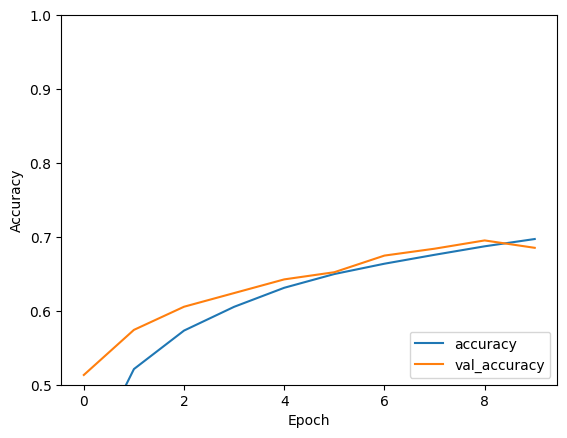

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)


## Make a Prediction!

Prepare the sample image to classify (this is an image that isn't in CIFAR-10)

In [8]:
car_url = "https://github.com/ashna-khemani/cnn-examples/blob/main/CIFAR-10/sample.png?raw=true"
car_path = tf.keras.utils.get_file('sample_car', origin=car_url)

# Get the image to the right size
img = tf.keras.utils.load_img(
    car_path, target_size=(32, 32)
)

# Turn the image into an array
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)



Get prediction scores for each category

In [9]:
predictions = cnn_model.predict(img_array)
print(predictions)


1/1 [==============================] - 0s 188ms/step
[[-261.11978   401.31366  -156.40048  -307.155    -977.3217   -239.09969
   -32.84356  -424.7383    149.82587   121.345314]]


"Softmax" these scores. Make them probability-based so they sum to 1

In [10]:
score = tf.nn.softmax(predictions[0])
print(score)

tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


This is a correct prediction! From the dataset documentation, the order of labels are `[airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck]`. We see from our list of `predictions` that it gave the highest score to the second category, `automobile`, which is correct. In fact, it's so confident that once we softmax the predictions (so they're probability-based and sum to 1), it assigns it a confidence of 1 (100%). Nice!

*Note: confidences of 100% are cool but in practice should be doubted. It's possible that the data set (and sample) are biased, too small, or not representative of real-world variations. To be absolutely sure a model is reliable, it must be trained and evaluated on a wide diversity of data. This diversity may be hard to achieve in our specific case, since CIFAR-10 is a relatively small dataset.*

## Export to TensorFlow Lite Model
*Helps the model run on apps, mobile devices, etc.*

Create Lite model from existing `cnn_model`

In [11]:
# Convert the model to a Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()

# Save Lite model
with open('cifar10_model.tflite', 'wb') as f:
  f.write(tflite_model)

Load Lite model, get it ready to classify an image

In [14]:
# Load Lite model
TF_MODEL_FILE_PATH = 'cifar10_model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

# Get the signature and names of inputs and outputs.
# Note the 'inputs' and 'outputs' is the same from cnn_model.summary() - conv2d_input and dense_1
interpreter.get_signature_list()


{'serving_default': {'inputs': ['conv2d_input'], 'outputs': ['dense_1']}}

In [15]:
# Pass signature ('serving_default') for model so we can classify a flower using Lite
classify_lite = interpreter.get_signature_runner('serving_default')

Make prediction (using the same sample image)

In [17]:
predictions_lite = classify_lite(conv2d_input=img_array)['dense_1'] # We specify the 'inputs' and 'outputs' here
score_lite = tf.nn.softmax(predictions_lite)
print(score_lite)


tf.Tensor([[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


There shouldn't be a huge difference between the original and Lite models' predictions

In [18]:
print(np.max(np.abs(predictions - predictions_lite)))

0.00032806396
